# Simulate an disease spread model, SIR (Susceptible, Infected, Recovered)

## Install Packages

In [ ]:
#install.packages("EpiModel")  # Install EpiModel if not already installed
library(EpiModel)  # Load the package

Installing package into 'C:/Users/feord/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'DEoptimR', 'cachem', 'rbibutils', 'robustbase', 'ergm.multi', 'trust', 'lpSolveAPI', 'rle', 'memoise', 'Rdpack', 'deSolve', 'networkDynamic', 'tergm', 'statnet.common', 'doParallel', 'ergm', 'network', 'ape', 'coda', 'networkLite'




package 'DEoptimR' successfully unpacked and MD5 sums checked
package 'cachem' successfully unpacked and MD5 sums checked
package 'rbibutils' successfully unpacked and MD5 sums checked
package 'robustbase' successfully unpacked and MD5 sums checked
package 'ergm.multi' successfully unpacked and MD5 sums checked
package 'trust' successfully unpacked and MD5 sums checked
package 'lpSolveAPI' successfully unpacked and MD5 sums checked
package 'rle' successfully unpacked and MD5 sums checked
package 'memoise' successfully unpacked and MD5 sums checked
package 'Rdpack' successfully unpacked and MD5 sums checked
package 'deSolve' successfully unpacked and MD5 sums checked
package 'networkDynamic' successfully unpacked and MD5 sums checked
package 'tergm' successfully unpacked and MD5 sums checked
package 'statnet.common' successfully unpacked and MD5 sums checked
package 'doParallel' successfully unpacked and MD5 sums checked
package 'ergm' successfully unpacked and MD5 sums checked
package 

Loading required package: deSolve

Loading required package: networkDynamic

Loading required package: network


'network' 1.19.0 (2024-12-08), part of the Statnet Project
* 'news(package="network")' for changes since last version
* 'citation("network")' for citation information
* 'https://statnet.org' for help, support, and other information



'networkDynamic' 0.11.5 (2024-11-21), part of the Statnet Project
* 'news(package="networkDynamic")' for changes since last version
* 'citation("networkDynamic")' for citation information
* 'https://statnet.org' for help, support, and other information


Loading required package: tergm

Loading required package: ergm


'ergm' 4.8.1 (2025-01-20), part of the Statnet Project
* 'news(package="ergm")' for changes since last version
* 'citation("ergm")' for citation information
* 'https://statnet.org' for help, support, and other information


'ergm' 4 is a major update that introduces some backwards-incompatible
changes. Please type 'news(package="

## Run a deterministic model

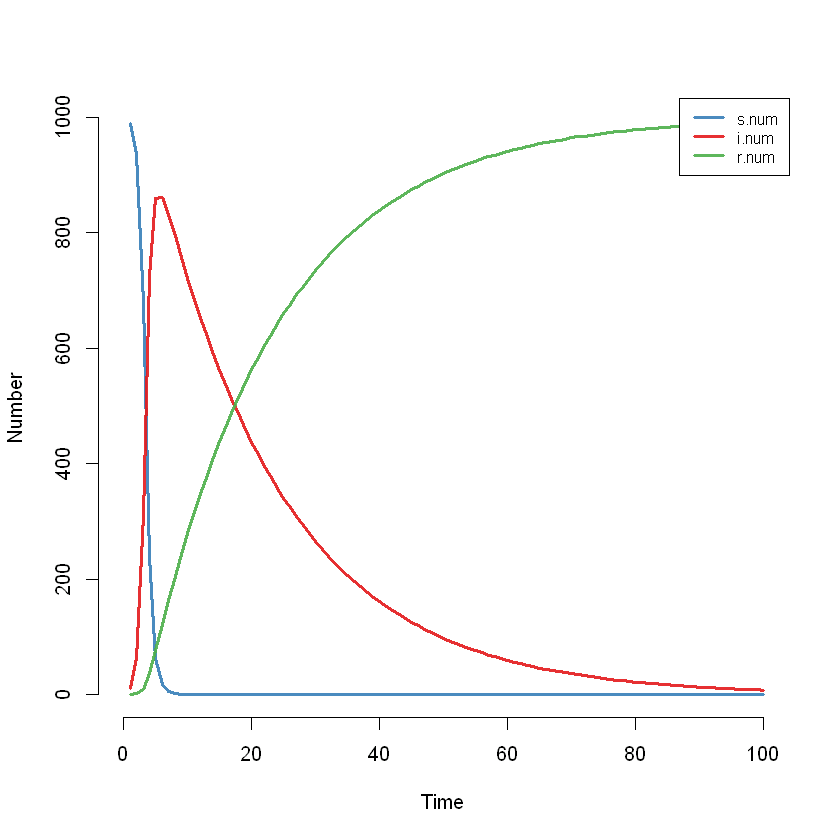

In [2]:
# Define parameters for the SIR model
param <- param.dcm(
  inf.prob = 0.2,   # Probability of infection per contact
  act.rate = 10,    # Number of contacts per person per time step
  rec.rate = 0.05   # Recovery rate per time step
)

# Define the initial population
init <- init.dcm(
  s.num = 990,  # Number of susceptible individuals
  i.num = 10,   # Number of infected individuals
  r.num = 0     # Number of recovered individuals
)

# Control settings for the simulation
control <- control.dcm(type = "SIR", nsteps = 100)

# Run the deterministic compartmental model
sir_model <- dcm(param, init, control)

# Plot the results
plot(sir_model)

## Run a stochastic model

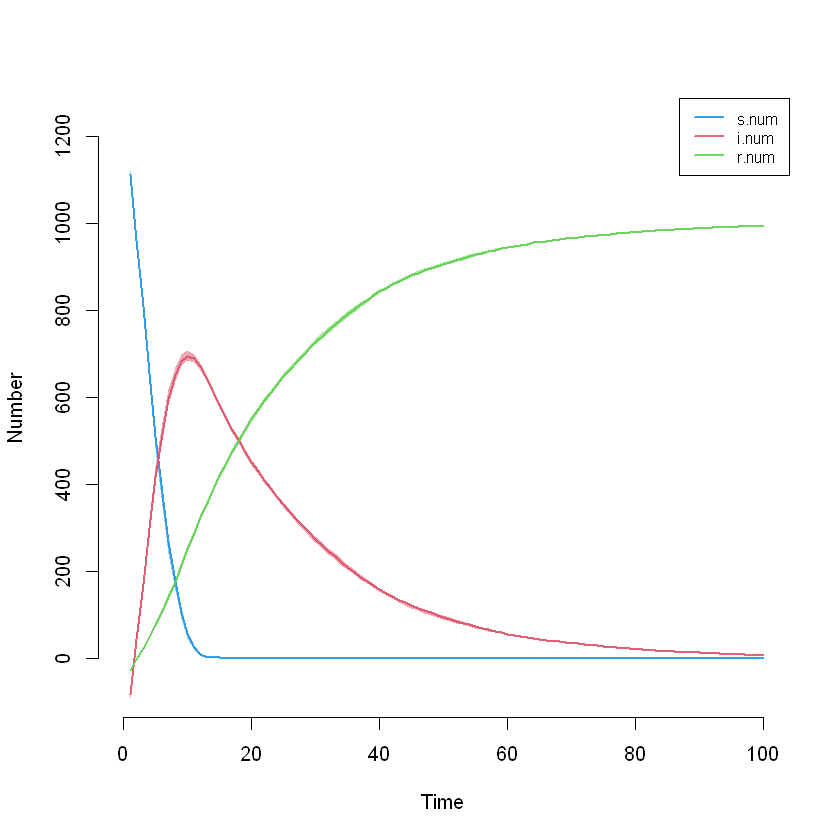

In [3]:
# Define parameters for stochastic simulation
param_stoch <- param.icm(
  inf.prob = 0.2,   # Infection probability per contact
  act.rate = 10,    # Number of contacts per person per step
  rec.rate = 0.05   # Recovery rate
)

# Set initial conditions
init_stoch <- init.icm(
  s.num = 990,
  i.num = 10,
  r.num = 0
)

# Define control settings
control_stoch <- control.icm(
  type = "SIR",
  nsteps = 100,
  nsims = 5  # Run 5 simulations to introduce randomness
)

# Run the stochastic model
sir_stoch_model <- icm(param_stoch, init_stoch, control_stoch)

# Plot the stochastic model results
plot(sir_stoch_model)

## Network based simulation, social network

Starting maximum pseudolikelihood estimation (MPLE):

Obtaining the responsible dyads.

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.




Starting Network Simulation...
Epidemic Simulation
----------------------------
Simulation: 1/3
Timestep: 2/50
Prevalence: 8
Population Size: 100
----------------------------
Epidemic Simulation
----------------------------
Simulation: 1/3
Timestep: 3/50
Prevalence: 14
Population Size: 100
----------------------------
Epidemic Simulation
----------------------------
Simulation: 1/3
Timestep: 4/50
Prevalence: 17
Population Size: 100
----------------------------
Epidemic Simulation
----------------------------
Simulation: 1/3
Timestep: 5/50
Prevalence: 19
Population Size: 100
----------------------------
Epidemic Simulation
----------------------------
Simulation: 1/3
Timestep: 6/50
Prevalence: 22
Population Size: 100
----------------------------
Epidemic Simulation
----------------------------
Simulation: 1/3
Timestep: 7/50
Prevalence: 21
Population Size: 100
----------------------------
Epidemic Simulation
----------------------------
Simulation: 1/3
Timestep: 8/50
Prevalence: 

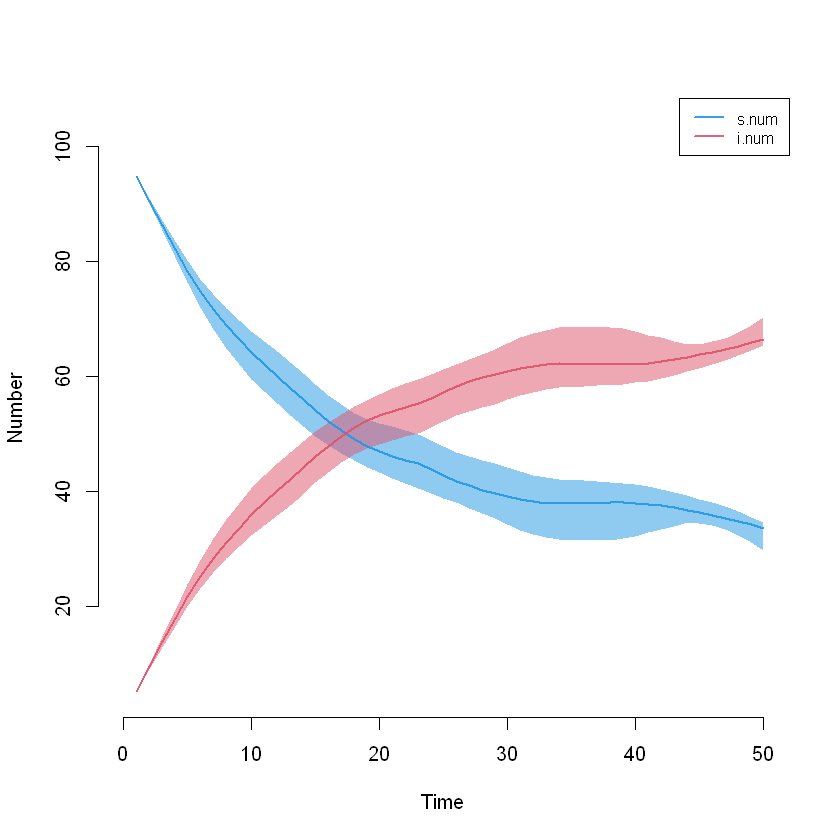

In [4]:
# Define a simple network with 100 nodes (individuals)
nw <- network.initialize(100, directed = FALSE)

# Define network formation model
formation <- ~edges
target.stats <- 50  # Target number of edges
coef.diss <- dissolution_coefs(dissolution = ~offset(edges), duration = 10)

# Fit the network model
est <- netest(nw, formation, target.stats, coef.diss, edapprox = TRUE)

# Define parameters for epidemic simulation
param_net <- param.net(
  inf.prob = 0.3,  # Probability of infection per contact
  act.rate = 5,    # Number of contacts per time step
  rec.rate = 0.1   # Recovery rate
)

# Define initial conditions
init_net <- init.net(
  i.num = 5  # 5 initially infected individuals
)

# Define control settings
control_net <- control.net(
  type = "SIS",  # Susceptible-Infected-Susceptible (re-infection possible)
  nsteps = 50,   # Simulate for 50 time steps
  nsims = 3      # Run 3 simulations
)

# Run the network-based epidemic model
sim_net <- netsim(est, param_net, init_net, control_net)

# Plot the results
plot(sim_net)